In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from scipy.stats import chi2


import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import mutual_info_classif, f_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df_test = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Removing rows with missing values
my_list = df['TotalCharges'].values.tolist()
indices = [i for i, x in enumerate(my_list) if x == " "]
df = df.drop(indices)

df_test = df.copy()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Q1

In [3]:
#df.dtypes

In [4]:
# Convert TotalCharges to numeric
df[['TotalCharges']] = df[['TotalCharges']].apply(pd.to_numeric)
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [5]:
# Binning MonthlyCharges,TotalCharges and Tenure
df['MonthlyCharges_bin'] = pd.qcut(df.MonthlyCharges, 5)
df['TotalCharges_bin'] = pd.qcut(df.TotalCharges, 5)
df['Tenure_bin'] = pd.qcut(df.tenure, 5)

In [6]:
df1 = df.drop(['MonthlyCharges','TotalCharges','tenure'], axis = 1)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges_bin,TotalCharges_bin,Tenure_bin
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,No,"(25.05, 58.92]","(18.799, 267.07]","(0.999, 6.0]"
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,No,"(25.05, 58.92]","(944.17, 2048.95]","(20.0, 40.0]"
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(25.05, 58.92]","(18.799, 267.07]","(0.999, 6.0]"
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),No,"(25.05, 58.92]","(944.17, 2048.95]","(40.0, 60.8]"
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,Yes,"(58.92, 79.15]","(18.799, 267.07]","(0.999, 6.0]"


In [7]:
#df = df[df.Embarked.notnull()].copy()
def encode_it_all(df):
    # print(len(df[df.Embarked.isnull()]))
    
    cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn',
       'MonthlyCharges_bin', 'TotalCharges_bin','Tenure_bin']
    
    for feature in cols:
        # print(df[feature])
        df[feature + '_encoded'] = LabelEncoder().fit_transform(df[feature])

    enc_cols = []
    for c in cols:
        enc_cols.append(c + '_encoded')
        

    # one-hot encoding
    all_encodings = []
    encoded_features = []
    for feature in enc_cols:
        # print(feature)
        X = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        cols = [feature + '_' + str(i) for i in range(0, df[feature].nunique())]
        encoded_features += cols
        tmp_df = pd.DataFrame(X, columns=cols)
        tmp_df.index = df.index
        all_encodings.append(tmp_df)

    # then let's create a new df with all of these new variables
    return pd.concat([df, *all_encodings], axis=1),enc_cols

df2,enc_cols = encode_it_all(df1)
#df_test2 = encode_it_all(df_test)

### Q2

In [8]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

/tmp/ipykernel_15106/1206109776.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
/tmp/ipykernel_15106/1206109776.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
/home/nasiem/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-

/tmp/ipykernel_15106/1206109776.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:


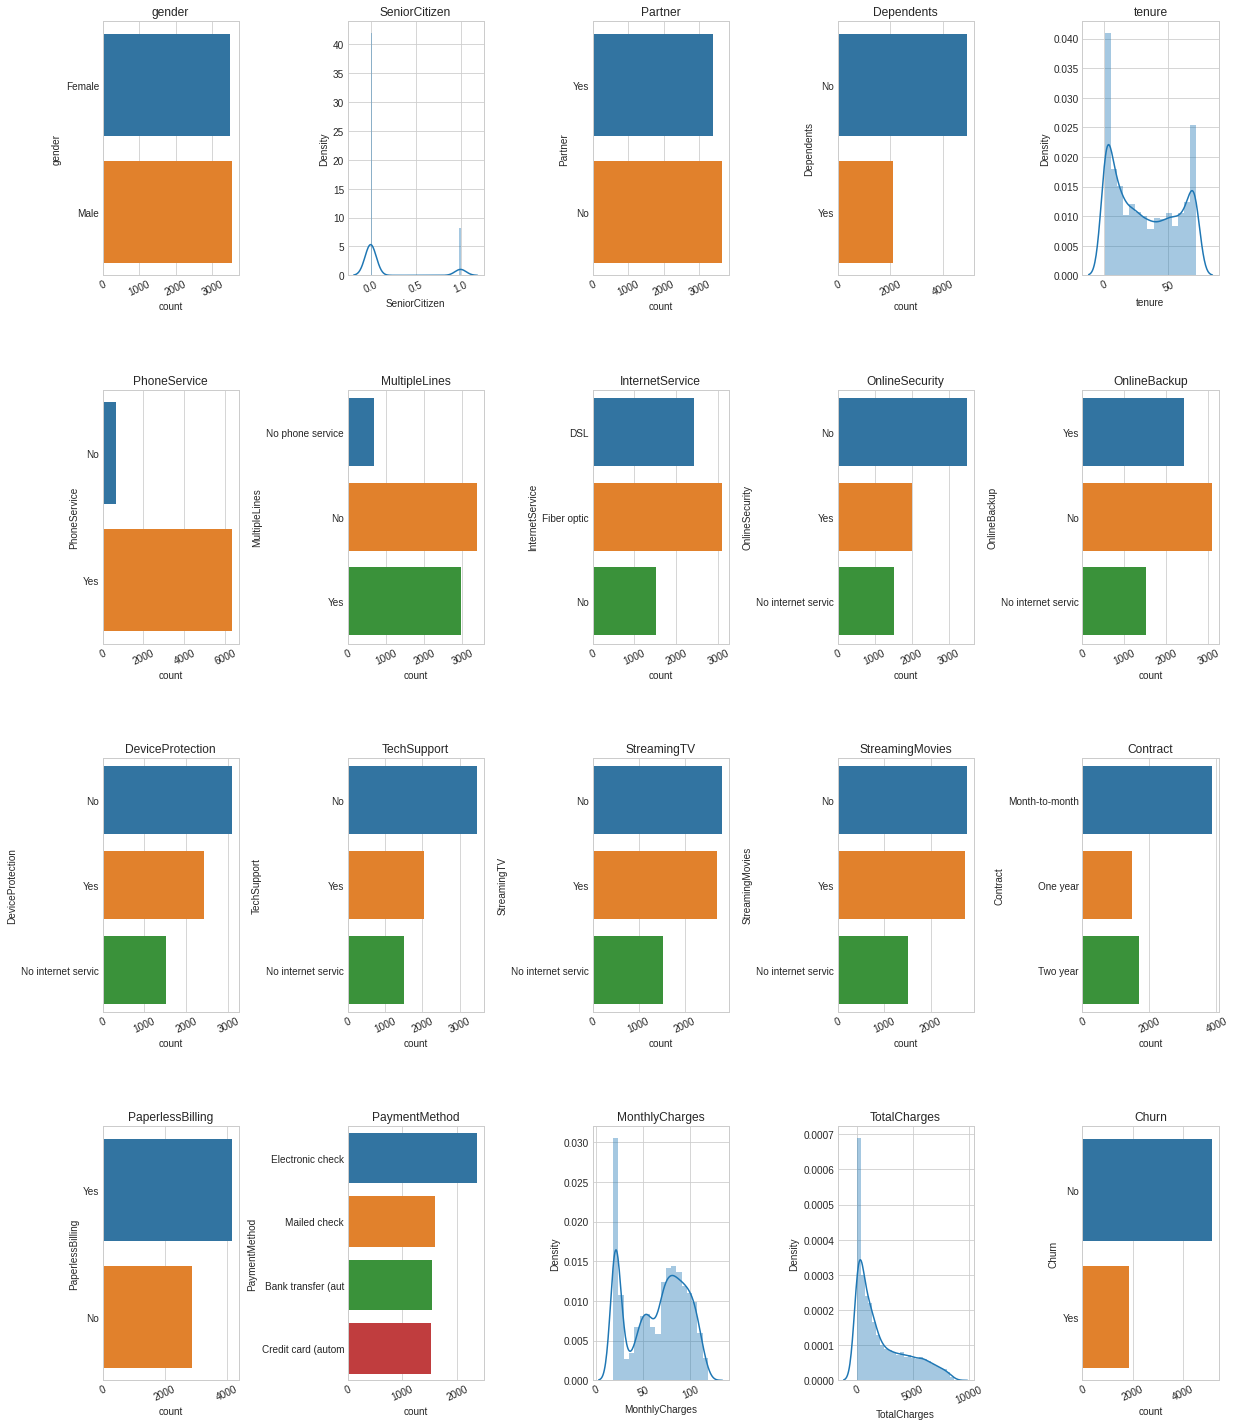

In [9]:
df_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

plot_distribution(df[df_cols], cols=5, width=20, height=25, hspace=0.45, wspace=0.8)

### Q3

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

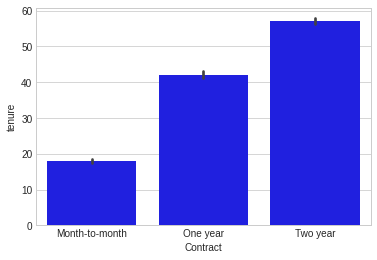

In [10]:
sns.barplot(x='Contract', y='tenure', data=df, color='blue', label='Tenure')

### Q4

In [11]:
encoded_features = []
for f in df2.columns:
    if 'encoded' in f and 'Churn' not in f:
        encoded_features.append(f)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df2[encoded_features], df2['Churn_encoded_0'], test_size=0.2)

Feature 0: 0.821824
Feature 1: 117.225371
Feature 2: 122.424269
Feature 3: 147.143314
Feature 4: 0.796537
Feature 5: 6.419783
Feature 6: 11.005655
Feature 7: 492.708223
Feature 8: 221.509224
Feature 9: 174.018607
Feature 10: 488.981971
Feature 11: 9.931579
Feature 12: 5.051852
Feature 13: 985.439930
Feature 14: 226.178449
Feature 15: 72.556591
Feature 16: 201.747834
Feature 17: 295.761190
Feature 18: 825.457073
Feature 19: 0.821824
Feature 20: 0.821824
Feature 21: 117.225371
Feature 22: 117.225371
Feature 23: 122.424269
Feature 24: 122.424269
Feature 25: 147.143314
Feature 26: 147.143314
Feature 27: 0.796537
Feature 28: 0.796537
Feature 29: 4.585626
Feature 30: 0.796537
Feature 31: 7.281161
Feature 32: 89.513460
Feature 33: 578.010423
Feature 34: 300.339769
Feature 35: 718.547770
Feature 36: 300.339769
Feature 37: 164.363400
Feature 38: 429.582854
Feature 39: 300.339769
Feature 40: 39.686194
Feature 41: 364.535321
Feature 42: 300.339769
Feature 43: 23.086913
Feature 44: 719.444342
Feat

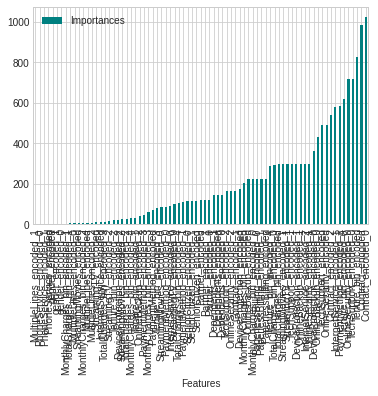

In [13]:
from sklearn.datasets import make_regression


def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
_, _, fs = select_features(X_train, y_train,X_test)
final_df = pd.DataFrame({ "Features": pd.DataFrame(X_train).columns, "Importances": fs.scores_})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color='teal', x='Features')
# what are scores for the feature
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

### Q5

In [14]:
sns.set(rc={'figure.figsize':(8,6)})

In [15]:
#cross = pd.crosstab(df.MonthlyCharges_bin,df.Churn)
#cross.reset_index(level=0, inplace=True)

#### Churn vs Tenure

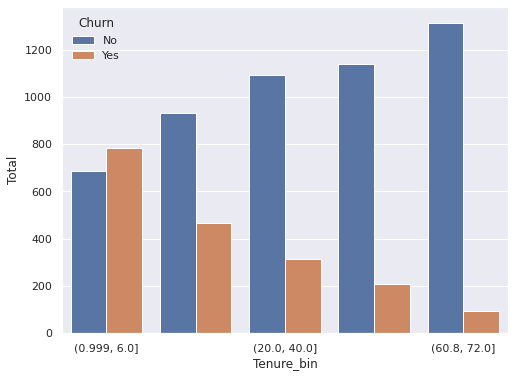

In [16]:
df_tb = df.value_counts(["Tenure_bin", "Churn"]).to_frame()
df_tb.reset_index(level=0, inplace=True)
df_tb.reset_index(level=0, inplace=True)
df_tb = df_tb.rename(columns={0: 'Total'})

ax = sns.barplot(x="Tenure_bin", y="Total", hue="Churn", data=df_tb)

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()

#### Churn vs Contract

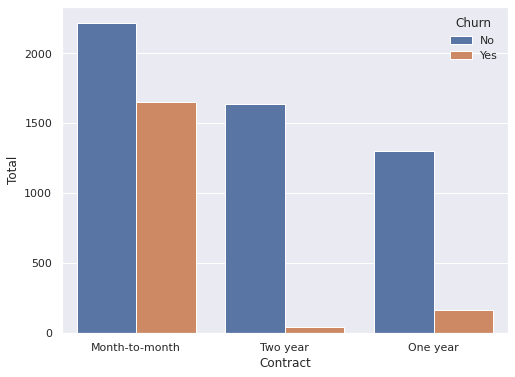

In [17]:
df_c = df.value_counts(["Contract", "Churn"]).to_frame()
df_c.reset_index(level=0, inplace=True)
df_c.reset_index(level=0, inplace=True)
df_c = df_c.rename(columns={0: 'Total'})

ax = sns.barplot(x="Contract", y="Total", hue="Churn", data=df_c)

#### Churn vs SeniorCitizen

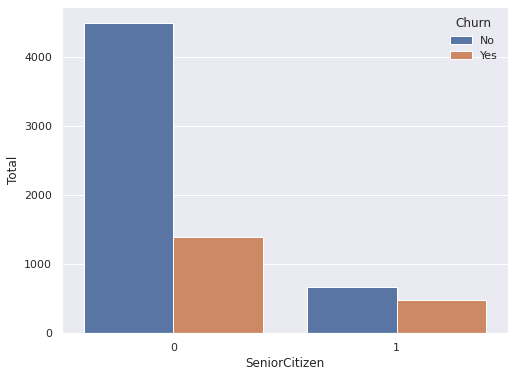

In [18]:
df_s = df.value_counts(["SeniorCitizen", "Churn"]).to_frame()
df_s.reset_index(level=0, inplace=True)
df_s.reset_index(level=0, inplace=True)
df_s = df_s.rename(columns={0: 'Total'})

ax = sns.barplot(x="SeniorCitizen", y="Total", hue="Churn", data=df_s)

#### Churn vs MonthlyCharges

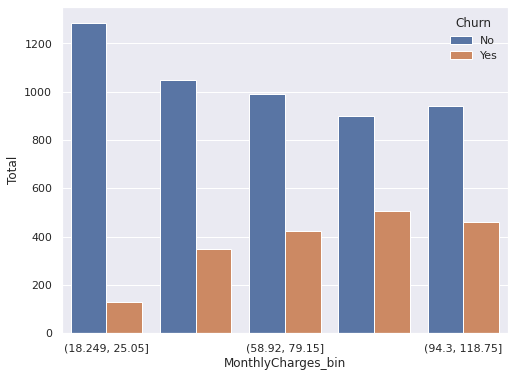

In [19]:
df_mc = df.value_counts(["MonthlyCharges_bin", "Churn"]).to_frame()
df_mc.reset_index(level=0, inplace=True)
df_mc.reset_index(level=0, inplace=True)
df_mc = df_mc.rename(columns={0: 'Total'})

ax = sns.barplot(x="MonthlyCharges_bin", y="Total", hue="Churn", data=df_mc)

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()

#### Churn vs TotalCharges

### Q6

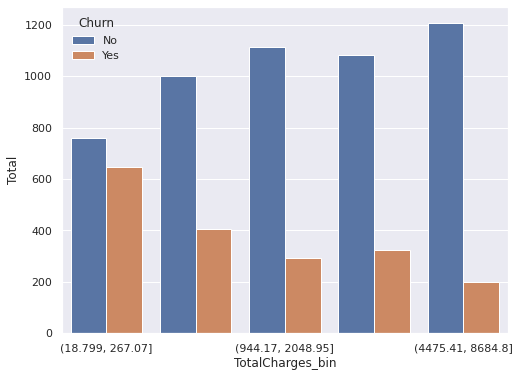

In [20]:
df_tc = df.value_counts(["TotalCharges_bin", "Churn"]).to_frame()
df_tc.reset_index(level=0, inplace=True)
df_tc.reset_index(level=0, inplace=True)
df_tc = df_tc.rename(columns={0: 'Total'})

ax = sns.barplot(x="TotalCharges_bin", y="Total", hue="Churn", data=df_tc)

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()

#### Random Forest

                        Features  Importances
62  MonthlyCharges_bin_encoded_0     0.002154
34     InternetService_encoded_2     0.002440
27        PhoneService_encoded_0     0.002604
45         TechSupport_encoded_1     0.002741
28        PhoneService_encoded_1     0.002743
..                           ...          ...
17      TotalCharges_bin_encoded     0.034628
7         OnlineSecurity_encoded     0.038112
18            Tenure_bin_encoded     0.057355
53            Contract_encoded_0     0.065137
13              Contract_encoded     0.067435

[77 rows x 2 columns]


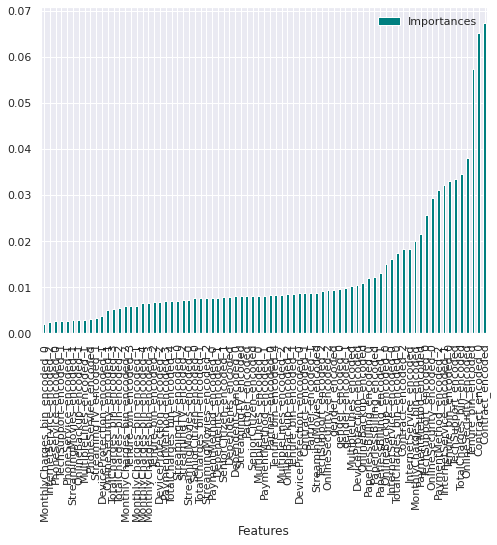

In [21]:
model = RandomForestClassifier(n_estimators=250, random_state=42, max_depth=10)
# fit the model to start training.
model.fit(X_train, y_train)
# get the importance of the resulting features.
importances = model.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({ "Features": pd.DataFrame(X_train).columns, "Importances": importances})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color='teal', x='Features')
print(final_df)

#### L1 Regularisation

In [22]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7)
model = SelectFromModel(logistic)  # this chooses the best features for us!
model.fit(X_train, y_train)
# model.

selected_feat = X_train.columns[(model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(model.estimator_.coef_ == 0)))
print(selected_feat)

total features: 77
selected features: 39
features with coefficients shrank to zero: 38
Index(['gender_encoded', 'Dependents_encoded', 'PhoneService_encoded',
       'MultipleLines_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'TechSupport_encoded', 'StreamingTV_encoded',
       'StreamingMovies_encoded', 'Contract_encoded', 'PaymentMethod_encoded',
       'TotalCharges_bin_encoded', 'Tenure_bin_encoded', 'gender_encoded_1',
       'SeniorCitizen_encoded_0', 'Dependents_encoded_1',
       'MultipleLines_encoded_0', 'InternetService_encoded_1',
       'OnlineSecurity_encoded_1', 'OnlineBackup_encoded_1',
       'DeviceProtection_encoded_1', 'StreamingTV_encoded_2',
       'StreamingMovies_encoded_1', 'StreamingMovies_encoded_2',
       'Contract_encoded_1', 'Contract_encoded_2',
       'PaperlessBilling_encoded_0', 'PaymentMethod_encoded_1',
       'PaymentMethod_encoded_2', 'MonthlyCharges_bin_encoded_1',
       'MonthlyCharges_bin_encoded_2', 'MonthlyCharges_bin_en